<a href="https://www.kaggle.com/code/kusumakar/flight-price-eda-predictions-r2-score-0-95?scriptVersionId=203279712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Load the Data in a Data Frame </p></div>

In [2]:
df=pd.read_csv("/kaggle/input/goibibo-flight-data/goibibo_flights_data.csv")

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> View the Data </p></div>

In [3]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Check for missing values in Data </p></div>

In [4]:
df.isnull().sum()

flight date         0
airline             0
flight_num          0
class               0
from                0
dep_time            0
to                  0
arr_time            0
duration            0
price               0
stops               0
Unnamed: 11    300261
Unnamed: 12    300261
dtype: int64

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Drop the Columns with Missing Values </p>
<br>
<p> I am dropping Unnamed:11 and Unnamed:12 because all the values in the columns are null
</div>

In [5]:
df=df.dropna(axis=1)
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop
...,...,...,...,...,...,...,...,...,...,...,...
300256,13-08-2023,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,10h 05m,"70,304",1-stop
300257,13-08-2023,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,10h 25m,"78,262",1-stop
300258,13-08-2023,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,13h 50m,"80,285",1-stop
300259,13-08-2023,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,10h 00m,"82,809",1-stop


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> DataTypes in the columns </p></div>

In [6]:
df.dtypes

flight date    object
airline        object
flight_num     object
class          object
from           object
dep_time       object
to             object
arr_time       object
duration       object
price          object
stops          object
dtype: object

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Data Transformation </p>

<ul>
    <li> Extract Month from Date</li>
    <li>Extract Hours from Departure Time</li>
    <li>Convert duration to Minutes</li>
    <li>Clean "Stops" Column</li>
    </ul>

</div>

<div style="background-color:orange; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Custom Methods for Data Transformations </p>

<ul>
    <li> convert_to_minutes( x ) : This function will convert duration column to minutes</li>
    <li>clean_stops( x ) : This function will return Number of Stops of the flight</li>
    
</ul>
</p>
</div>

In [7]:
def convert_to_minutes(x):
    hours, minutes = x.split(" ")
    hours = hours.replace("h","")
    minutes = minutes.replace("m", "")
    if len(hours)==0:
        hours = 0
    elif len(minutes)==0:
        minutes =0 
    hours = float(hours)
    minutes = float(minutes)
    return hours*60+minutes
def clean_stops(x):
    if 'non-stop' in x:
        return 0
    elif '1-' in x:
        return 1
    elif '2' in x:
        return 2
    elif '3' in x:
        return 3
    elif '4' in x:
        return 4
    elif '5' in x:
        return 5
    elif '6' in x:
        return 6
    

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Apply Transformations in the columns </p>



</div>

In [8]:
df['flight date'] = pd.to_datetime(df['flight date'])
df['duration'] = df['duration'].apply(lambda s:convert_to_minutes(s))

/tmp/ipykernel_17/1621141352.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['flight date'] = pd.to_datetime(df['flight date'])


In [9]:
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,130.0,"6,013",non-stop
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,140.0,"6,013",non-stop
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,130.0,"6,016",non-stop
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,135.0,"6,015",non-stop
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,140.0,"6,015",non-stop
...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,605.0,"70,304",1-stop
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,625.0,"78,262",1-stop
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,830.0,"80,285",1-stop
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,600.0,"82,809",1-stop


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Clean Stops Column</p>


</div>

In [10]:
df['stops']=df['stops'].apply(lambda s:clean_stops(s))

In [11]:
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,130.0,"6,013",0
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,140.0,"6,013",0
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,130.0,"6,016",0
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,135.0,"6,015",0
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,140.0,"6,015",0
...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,605.0,"70,304",1
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,625.0,"78,262",1
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,830.0,"80,285",1
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,600.0,"82,809",1


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Extraction of Month from Flight Date </p>
<p>
<ul>
    <li> I am extracting Month from Flight Date as this will help me understand in which month prices spike</li>
    <li>Price column as a comma, I will remove it and convert it into Float</li>
 </ul>
</p>
</div>

In [12]:
df['flight date']=pd.to_datetime(df['flight date'])
df['Month']=df['flight date'].dt.month
df['price']=df['price'].apply(lambda s:float(s.replace(',','')))
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,130.0,6013.0,0,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,140.0,6013.0,0,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,130.0,6016.0,0,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,135.0,6015.0,0,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,140.0,6015.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,605.0,70304.0,1,8
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,625.0,78262.0,1,8
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,830.0,80285.0,1,8
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,600.0,82809.0,1,8


In [13]:
df

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Month
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,130.0,6013.0,0,6
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,140.0,6013.0,0,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,130.0,6016.0,0,6
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,135.0,6015.0,0,6
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,140.0,6015.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45,Hyderabad,19:50,605.0,70304.0,1,8
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30,Hyderabad,22:55,625.0,78262.0,1,8
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05,Hyderabad,20:55,830.0,80285.0,1,8
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00,Hyderabad,17:00,600.0,82809.0,1,8


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Drop Unnecessary Columns </p>
<p>
<ul>
    <li> Drop "From" and "To" Column as Price does not depend on cities </li>
    <li>Drop Departure Time and Arrival Time because we have the flight duration column </li>
    <li>Remove Flight Number Column because we have airline column</li>
</ul>
</p>
</div>

In [14]:
df.drop(columns=['from','to','dep_time','arr_time','flight date','flight_num'],inplace=True)

In [15]:
df

,airline,class,duration,price,stops,Month
0,SpiceJet,economy,130.0,6013.0,0,6
1,SpiceJet,economy,140.0,6013.0,0,6
2,AirAsia,economy,130.0,6016.0,0,6
3,Vistara,economy,135.0,6015.0,0,6
4,Vistara,economy,140.0,6015.0,0,6
...,...,...,...,...,...,...
300256,Vistara,business,605.0,70304.0,1,8
300257,Vistara,business,625.0,78262.0,1,8
300258,Vistara,business,830.0,80285.0,1,8
300259,Vistara,business,600.0,82809.0,1,8


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Data Visualization </p>



</div>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='airline', ylabel='price'>

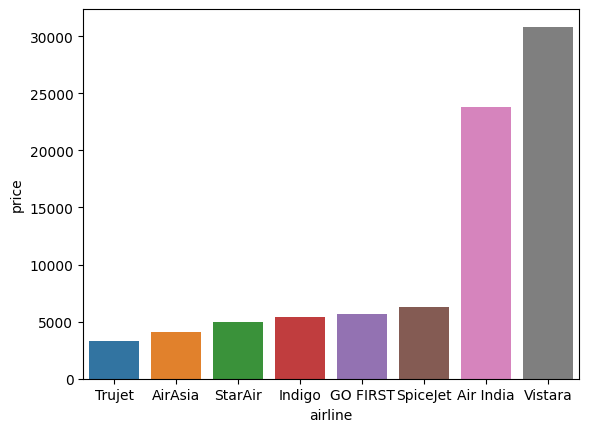

In [17]:
df2=df.groupby('airline').agg({"price":"mean"}).reset_index().sort_values(by='price')

sns.barplot(x='airline',y='price',data=df2)

<div style="background-color:orange; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Above Graph shows the cheapest to Expensive Flights </p>
<p>
<ul>
    <li> Vistara is most expensive</li>
    <li>Trujet is cheapest</li>   
    </ul>
</p>
</div>

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Price Trend over Months </p>
<p>

  
</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='price'>

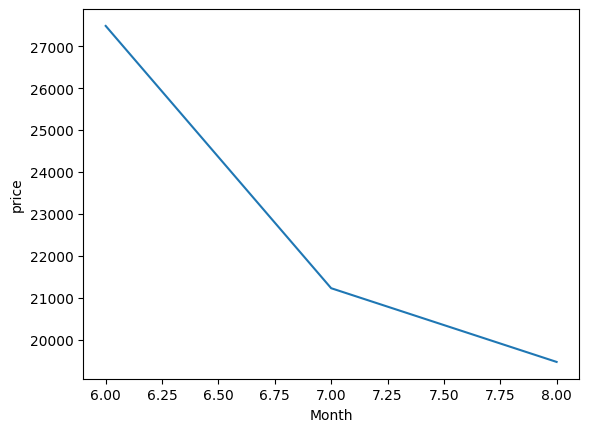

In [18]:
df2=df.groupby(["Month"]).agg({"price":"mean"}).reset_index().sort_values(by='price')
sns.lineplot(x='Month',y='price',data=df2)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


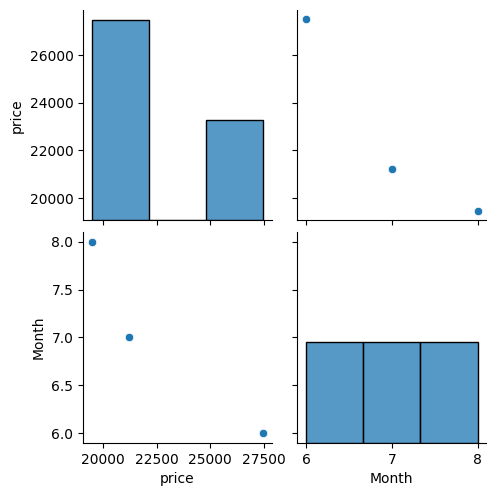

In [19]:
sns.pairplot(df2[['price',"Month"]])

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Impact of Stops on Prices </p>

</div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


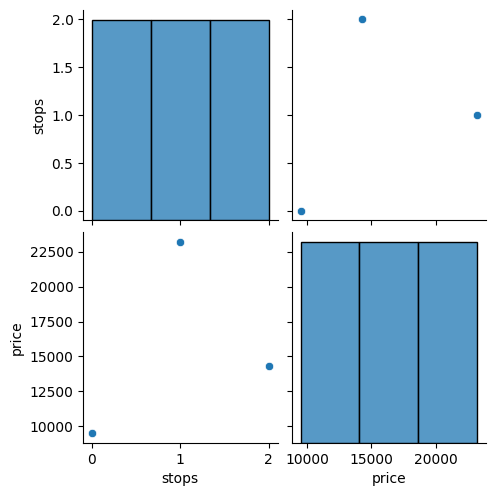

In [20]:
df2=df.groupby("stops").agg({"price":"mean"}).reset_index()
sns.pairplot(df2[['stops','price']])

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Above Graph shows the impact of Stops on Prices </p>
<p>
<ul>
    <li> Direct Flights are cheapest may be due to low distance</li>
    <li>Flights with 1 stop are expensive</li>   
    </ul>
</p>
</div>

In [21]:
df

,airline,class,duration,price,stops,Month
0,SpiceJet,economy,130.0,6013.0,0,6
1,SpiceJet,economy,140.0,6013.0,0,6
2,AirAsia,economy,130.0,6016.0,0,6
3,Vistara,economy,135.0,6015.0,0,6
4,Vistara,economy,140.0,6015.0,0,6
...,...,...,...,...,...,...
300256,Vistara,business,605.0,70304.0,1,8
300257,Vistara,business,625.0,78262.0,1,8
300258,Vistara,business,830.0,80285.0,1,8
300259,Vistara,business,600.0,82809.0,1,8


<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Impact of Class on Price </p>
<p>
<ul>
    <li> Business Class is most expensive</li>
    <li>Economic Class is cheapest</li>   
    </ul>
</p>
</div>

<Axes: xlabel='class', ylabel='price'>

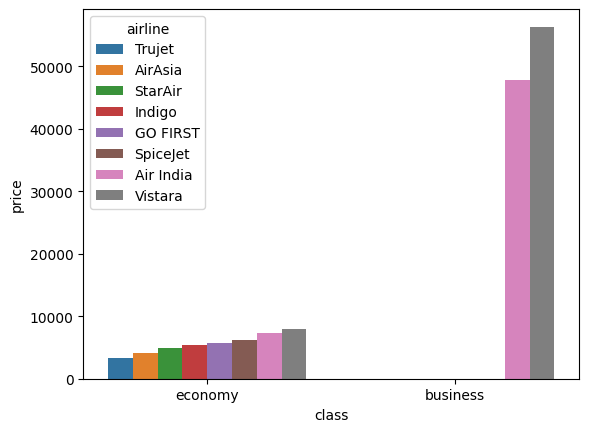

In [22]:
df2=df.groupby(["airline","class"]).agg({"price":"mean"}).reset_index().sort_values(by='price')
sns.barplot(x='class',y='price',data=df2,hue='airline')

- Vistara and Air India are the  most expensive Flights
- Non Stop Flights have least price , Flights with 1 stop have highest, while with 2 stops is medium
- Flight prices are highest in June and least in August. Probably, June is the vacation time and summer vacations when people travel more
- Business Class is available for Vistara and Air India, and are very expensive

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Checking Correlation in Values  </p>
<p>

</div>

<Axes: >

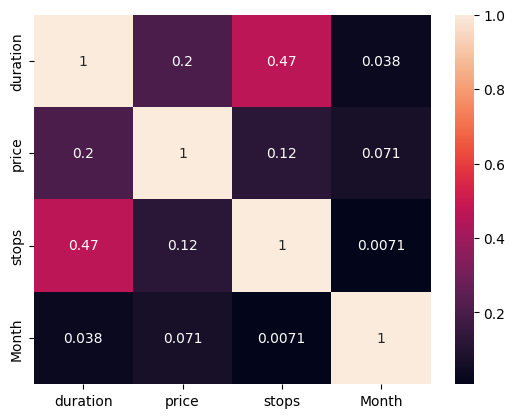

In [23]:
sns.heatmap(df[['duration', 'price', 'stops', 'Month']].corr().abs(),annot=True)

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Data Standardization and Encoding </p>
<p>
<ul>
    <li> I will encode Airline and Class Columns using OneHotEncoding</li>
    <li>I  will standardize numerical columns -'Month','stops','duration'</li>   
    </ul>
</p>
</div>

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [25]:
X=df.drop(columns='price')
Y=df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)


In [26]:
transformer = ColumnTransformer(
[
    ("encode",OneHotEncoder(),['airline','class']),
    ("standardise",StandardScaler(),['Month','stops','duration'])
    
],remainder='passthrough')

In [27]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Model Training and Evaluation</p>
<p>
    <p> I will use 4 different models and compare their accuracy</p>
<ul>
    <li> RandomForestRegressor</li>
    <li>DecisionTreeRegressor</li>   
     <li>LinearRegression</li>   
     <li>XGBoostRegressor</li>   
    </ul>
</p>
</div>

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error



In [29]:
models = {"Random Forest Regressor":RandomForestRegressor(),
         "Decision Tree Regressor":DecisionTreeRegressor(),
         "Linear Regressor":LinearRegression(),
         "XGBoost Regression":XGBRegressor()}

In [30]:
r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(X_train_transformed,Y_train)
    ypred = model.predict(X_test_transformed)
    r2_scores.append(r2_score(Y_test,ypred))
    mean_squared.append(mean_squared_error(Y_test,ypred))
    mean_absolute.append(mean_absolute_error(Y_test,ypred))
    model_list.append(model_name)
    

<div style="background-color:#66cdaa; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;">  Evaluation</p>
<p>
    <p> Below are the Scores for R-Squared, MAE, RMSE for different Models</p>

</p>
</div>

In [31]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores

accuracy_data

,Model,R2 Score
0,Random Forest Regressor,0.947961
1,Decision Tree Regressor,0.947737
2,Linear Regressor,0.903729
3,XGBoost Regression,0.945863


<div style="background-color:Yellow; padding: 10px 10px 10px 10px; border-radius: 10px; box-shadow: 2px 2px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:18px; font-family:tahoma; line-height: 2em; text-indent: 20px;"> Random Forest Regressor Performs the best. Fits the data best with R2 score of 0.95 </p>
<p>

</div>